#### This jupyter notebook is created by Izzy, and I made some changes in it. In this jupyter notebook, I use k-mean to cluster Hilo's parcels to 125 clusters, using the "Zoning_(Hawaii_County).shp" in the "Hilo_Parcel_Shapefiles" folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gpd

<AxesSubplot:>

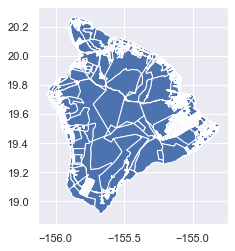

In [2]:
# Read the dataset
hilo_zones = gpd.read_file("../data/Hilo_Parcel_Shapefiles/Zoning_(Hawaii_County).shp").to_crs(epsg=4326)
hilo_zones.plot()

In [4]:
# Build the category column (assign each row a category)
hilo_zones['zone_type'] = "Not of Interest"
for i in range(len(hilo_zones)):
    zone = hilo_zones['zone'][i][:2]
    if zone == "RM":
        hilo_zones['zone_type'][i] = "Multi-Family Residence"
    elif zone == "RS":
        hilo_zones['zone_type'][i] = "Single-Family Residence"
    elif zone == "RD":
        hilo_zones['zone_type'][i] = "Double-Family Residence"
    elif zone == "CD":
        hilo_zones['zone_type'][i] = "Downtown"
    elif zone == "CG":
        hilo_zones['zone_type'][i] = "General Commercial"
    elif zone == "CN":
        hilo_zones['zone_type'][i] = "Neighborhood Commercial"
    elif zone == "CV":
        hilo_zones['zone_type'][i] = "Village Commercial"
    elif zone == "RC":
        hilo_zones['zone_type'][i] = "Commercial Residential Mix"
    elif zone == "MC":
        hilo_zones['zone_type'][i] = "Commercial Industrial Mix"
    elif zone == "UN":
        hilo_zones['zone_type'][i] = "University"
    elif zone == "V-":
        hilo_zones['zone_type'][i] = "Resort-Hotel"

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\3622474135.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hilo_zones['zone_type'][i] = "Single-Family Residence"
C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\3622474135.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hilo_zones['zone_type'][i] = "Village Commercial"
C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\3622474135.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [5]:
# Create centroid, longitude, and latitude columns based on the geodataframe's geometry
hilo_zones_interest = hilo_zones
hilo_zones_interest['Centroid'] = hilo_zones_interest.geometry.centroid
hilo_zones_interest['Long'] = hilo_zones_interest['Centroid'].x
hilo_zones_interest['Lat'] = hilo_zones_interest['Centroid'].y

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\258675031.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hilo_zones_interest['Centroid'] = hilo_zones_interest.geometry.centroid


In [6]:
# Select regions that are in Hilo's city boundary
hilo_zones_interest['in_range'] = 0
for i in range(len(hilo_zones_interest)):
    lat = hilo_zones_interest['Lat'].iloc[i]
    long = hilo_zones_interest['Long'].iloc[i]
    
    if lat > 19.62 and lat < 19.741 and long > -155.19 and long < -154.99:
        hilo_zones_interest['in_range'].iloc[i] = 1
hilo_zones_relevant = hilo_zones_interest[hilo_zones_interest["in_range"]==1]
hilo_zones_relevant.head(5)

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\1208897251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hilo_zones_interest['in_range'].iloc[i] = 1


,objectid,zoning_id,zone,district,from_,to_,date_,taxacres,ordinance,zone_map,st_areasha,st_perimet,geometry,zone_type,Centroid,Long,Lat,in_range
1861,1862,6499,A-20a,S. Hilo,None,None,None,None,None,2010,2.276729e+07,32526.223321,"POLYGON ((-155.15327 19.75268, -155.15313 19.7...",Not of Interest,POINT (-155.13609 19.73181),-155.136092,19.731814,1
1894,1895,6500,A-20a,S. Hilo,None,None,None,None,None,2030,4.038537e+05,5016.710470,"POLYGON ((-155.10012 19.74090, -155.09962 19.7...",Not of Interest,POINT (-155.10235 19.74023),-155.102351,19.740232,1
1897,1898,908,(breakwater),S. Hilo,None,None,None,None,None,2020,3.170354e+04,6199.261955,"POLYGON ((-155.06627 19.74369, -155.06468 19.7...",Not of Interest,POINT (-155.06187 19.73982),-155.061874,19.739818,1
1904,1905,3522,RS-10,S. Hilo,None,None,None,None,None,2030,5.088510e+04,1524.792470,"POLYGON ((-155.09202 19.73952, -155.09197 19.7...",Single-Family Residence,POINT (-155.09272 19.73957),-155.092724,19.739572,1
1905,1906,3530,MG-5a,S. Hilo,None,None,None,None,None,2030,4.156526e+04,1715.663459,"POLYGON ((-155.09025 19.74157, -155.09031 19.7...",Not of Interest,POINT (-155.09061 19.73812),-155.090606,19.738119,1


In [9]:
# Create area and centroid columns based on the geodataframe's geometry and select the columns I am interested
hilo_zones_relevant["Area"] = hilo_zones_relevant.geometry.area
hilo_zones_relevant["Centroid"] = hilo_zones_relevant.geometry.centroid
hilo_zones_relevant = hilo_zones_relevant[["objectid","zoning_id","zone","geometry","Centroid","Long","Lat","Area","zone_type"]]
hilo_zones_relevant.head(5)

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\194699191.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hilo_zones_relevant["Area"] = hilo_zones_relevant.geometry.area
d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\194699191.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hilo_zones_relevant["Centroid"] = hilo_z

,objectid,zoning_id,zone,geometry,Centroid,Long,Lat,Area,zone_type
1861,1862,6499,A-20a,"POLYGON ((-155.15327 19.75268, -155.15313 19.7...",POINT (-155.13609 19.73181),-155.136092,19.731814,0.001956,Not of Interest
1894,1895,6500,A-20a,"POLYGON ((-155.10012 19.74090, -155.09962 19.7...",POINT (-155.10235 19.74023),-155.102351,19.740232,0.000035,Not of Interest
1897,1898,908,(breakwater),"POLYGON ((-155.06627 19.74369, -155.06468 19.7...",POINT (-155.06187 19.73982),-155.061874,19.739818,0.000003,Not of Interest
1904,1905,3522,RS-10,"POLYGON ((-155.09202 19.73952, -155.09197 19.7...",POINT (-155.09272 19.73957),-155.092724,19.739572,0.000004,Single-Family Residence
1905,1906,3530,MG-5a,"POLYGON ((-155.09025 19.74157, -155.09031 19.7...",POINT (-155.09061 19.73812),-155.090606,19.738119,0.000004,Not of Interest


In [10]:
# create weight for each category and assign each row a category_weight
# Feel free to change the weights based on your need.
weight_dictionary = {"Multi-Family Residence": 3, "Resort-Hotel": 2, "Single-Family Residence": 1, "Double-Family Residence": 2, 
                     "General Commercial": 2, "Downtown": 2.5, "Neighborhood Commercial": 2, "Village Commercial": 2, 
                     "Commercial Residential Mix": 2, "Commercial Industrial Mix": 1.5, "University": 3, "Not of Interest":0.1}
hilo_zones_relevant["category_weight"] = hilo_zones_relevant["zone_type"].map(weight_dictionary)
hilo_zones_relevant.head(5)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,objectid,zoning_id,zone,geometry,Centroid,Long,Lat,Area,zone_type,category_weight
1861,1862,6499,A-20a,"POLYGON ((-155.15327 19.75268, -155.15313 19.7...",POINT (-155.13609 19.73181),-155.136092,19.731814,0.001956,Not of Interest,0.1
1894,1895,6500,A-20a,"POLYGON ((-155.10012 19.74090, -155.09962 19.7...",POINT (-155.10235 19.74023),-155.102351,19.740232,0.000035,Not of Interest,0.1
1897,1898,908,(breakwater),"POLYGON ((-155.06627 19.74369, -155.06468 19.7...",POINT (-155.06187 19.73982),-155.061874,19.739818,0.000003,Not of Interest,0.1
1904,1905,3522,RS-10,"POLYGON ((-155.09202 19.73952, -155.09197 19.7...",POINT (-155.09272 19.73957),-155.092724,19.739572,0.000004,Single-Family Residence,1.0
1905,1906,3530,MG-5a,"POLYGON ((-155.09025 19.74157, -155.09031 19.7...",POINT (-155.09061 19.73812),-155.090606,19.738119,0.000004,Not of Interest,0.1


In [11]:
# Calculate the weight of each point based on their area and category_weight
hilo_zones_relevant["weight"] = hilo_zones_relevant["Area"] * hilo_zones_relevant["category_weight"]
hilo_zones_relevant.head(5)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,objectid,zoning_id,zone,geometry,Centroid,Long,Lat,Area,zone_type,category_weight,weight
1861,1862,6499,A-20a,"POLYGON ((-155.15327 19.75268, -155.15313 19.7...",POINT (-155.13609 19.73181),-155.136092,19.731814,0.001956,Not of Interest,0.1,1.955638e-04
1894,1895,6500,A-20a,"POLYGON ((-155.10012 19.74090, -155.09962 19.7...",POINT (-155.10235 19.74023),-155.102351,19.740232,0.000035,Not of Interest,0.1,3.468911e-06
1897,1898,908,(breakwater),"POLYGON ((-155.06627 19.74369, -155.06468 19.7...",POINT (-155.06187 19.73982),-155.061874,19.739818,0.000003,Not of Interest,0.1,2.722754e-07
1904,1905,3522,RS-10,"POLYGON ((-155.09202 19.73952, -155.09197 19.7...",POINT (-155.09272 19.73957),-155.092724,19.739572,0.000004,Single-Family Residence,1.0,4.370680e-06
1905,1906,3530,MG-5a,"POLYGON ((-155.09025 19.74157, -155.09031 19.7...",POINT (-155.09061 19.73812),-155.090606,19.738119,0.000004,Not of Interest,0.1,3.570119e-07


In [12]:
# Select the columns I want and produce the hilo_parcel_skater shapefile that I will use in the skater algorithm
# for Hilo
hilo_parcel_skater = hilo_zones_relevant.iloc[:,[0,1,2,3,5,6,7,8,9,10]]
hilo_parcel_skater.to_file("hilo_parcel_skater.shp")

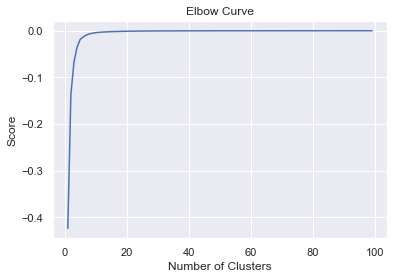

In [107]:
# Draw elbom plot to find best k
K_clusters = range(1,100)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = hilo_zones_relevant[['Lat']]
X_axis = hilo_zones_relevant[['Long']]
score = [kmeans[i].fit(Y_axis, X_axis).score(Y_axis, X_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Any clusters large than ~10 have good score, so using clusters > 10 is rine

In [13]:
# Perform weighted k means with 125 clusters (weight is the "weight" column)
kmeans = KMeans(n_clusters = 125, init ='k-means++')
kmeans.fit(hilo_zones_relevant[["Lat","Long"]], sample_weight = hilo_zones_relevant["weight"]) # Compute k-means clustering.
hilo_zones_relevant['cluster_label'] = kmeans.fit_predict(hilo_zones_relevant[["Lat","Long"]], sample_weight = hilo_zones_relevant["weight"])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(hilo_zones_relevant[["Lat","Long"]], sample_weight = hilo_zones_relevant["weight"]) # Labels of each point
hilo_zones_relevant.head(10)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,objectid,zoning_id,zone,geometry,Centroid,Long,Lat,Area,zone_type,category_weight,weight,cluster_label
1861,1862,6499,A-20a,"POLYGON ((-155.15327 19.75268, -155.15313 19.7...",POINT (-155.13609 19.73181),-155.136092,19.731814,1.955638e-03,Not of Interest,0.1,1.955638e-04,74
1894,1895,6500,A-20a,"POLYGON ((-155.10012 19.74090, -155.09962 19.7...",POINT (-155.10235 19.74023),-155.102351,19.740232,3.468911e-05,Not of Interest,0.1,3.468911e-06,27
1897,1898,908,(breakwater),"POLYGON ((-155.06627 19.74369, -155.06468 19.7...",POINT (-155.06187 19.73982),-155.061874,19.739818,2.722754e-06,Not of Interest,0.1,2.722754e-07,103
1904,1905,3522,RS-10,"POLYGON ((-155.09202 19.73952, -155.09197 19.7...",POINT (-155.09272 19.73957),-155.092724,19.739572,4.370680e-06,Single-Family Residence,1.0,4.370680e-06,27
1905,1906,3530,MG-5a,"POLYGON ((-155.09025 19.74157, -155.09031 19.7...",POINT (-155.09061 19.73812),-155.090606,19.738119,3.570119e-06,Not of Interest,0.1,3.570119e-07,27
1909,1910,3504,OPEN,"POLYGON ((-155.15828 19.74074, -155.15815 19.7...",POINT (-155.15723 19.73764),-155.157232,19.737638,2.202835e-05,Not of Interest,0.1,2.202835e-06,60
1911,1912,3516,RS-15,"POLYGON ((-155.09354 19.73945, -155.09375 19.7...",POINT (-155.09511 19.73944),-155.095113,19.739440,2.849818e-06,Single-Family Residence,1.0,2.849818e-06,27
1915,1916,3523,MG-1a,"POLYGON ((-155.09144 19.73850, -155.09155 19.7...",POINT (-155.09171 19.73841),-155.091714,19.738408,6.766926e-07,Not of Interest,0.1,6.766926e-08,27
1916,1917,978,OPEN,"POLYGON ((-155.03863 19.73915, -155.03861 19.7...",POINT (-155.03805 19.73757),-155.038052,19.737568,1.038261e-05,Not of Interest,0.1,1.038261e-06,39
1917,1918,6907,A-20a,"POLYGON ((-155.09314 19.73639, -155.09317 19.7...",POINT (-155.09534 19.73715),-155.095341,19.737146,1.382381e-05,Not of Interest,0.1,1.382381e-06,27


In [14]:
# Create geodataframe for clustered data
polygon = hilo_zones_relevant["geometry"]
hilo_zones_relevant_gdf = gpd.GeoDataFrame(
    hilo_zones_relevant, geometry=gpd.points_from_xy(hilo_zones_relevant.Long, hilo_zones_relevant.Lat, crs='epsg:4326'),crs=4326) 
hilo_zones_relevant_gdf["polygon"] = polygon
hilo_zones_relevant_gdf.head(5)

,objectid,zoning_id,zone,geometry,Centroid,Long,Lat,Area,zone_type,category_weight,weight,cluster_label,polygon
1861,1862,6499,A-20a,POINT (-155.13609 19.73181),POINT (-155.13609 19.73181),-155.136092,19.731814,0.001956,Not of Interest,0.1,1.955638e-04,74,"POLYGON ((-155.15327 19.75268, -155.15313 19.7..."
1894,1895,6500,A-20a,POINT (-155.10235 19.74023),POINT (-155.10235 19.74023),-155.102351,19.740232,0.000035,Not of Interest,0.1,3.468911e-06,27,"POLYGON ((-155.10012 19.74090, -155.09962 19.7..."
1897,1898,908,(breakwater),POINT (-155.06187 19.73982),POINT (-155.06187 19.73982),-155.061874,19.739818,0.000003,Not of Interest,0.1,2.722754e-07,103,"POLYGON ((-155.06627 19.74369, -155.06468 19.7..."
1904,1905,3522,RS-10,POINT (-155.09272 19.73957),POINT (-155.09272 19.73957),-155.092724,19.739572,0.000004,Single-Family Residence,1.0,4.370680e-06,27,"POLYGON ((-155.09202 19.73952, -155.09197 19.7..."
1905,1906,3530,MG-5a,POINT (-155.09061 19.73812),POINT (-155.09061 19.73812),-155.090606,19.738119,0.000004,Not of Interest,0.1,3.570119e-07,27,"POLYGON ((-155.09025 19.74157, -155.09031 19.7..."


In [15]:
# Create geodataframe for each cluster center
center_df = pd.DataFrame(centers, columns = ['lat','long'])
center_gdf = gpd.GeoDataFrame(
    center_df, geometry=gpd.points_from_xy(center_df.long, center_df.lat, crs='epsg:4326'),crs=4326) 
center_gdf.head(5)

,lat,long,geometry
0,19.675587,-155.138099,POINT (-155.13810 19.67559)
1,19.717806,-155.071710,POINT (-155.07171 19.71781)
2,19.640788,-155.041167,POINT (-155.04117 19.64079)
3,19.711296,-155.104768,POINT (-155.10477 19.71130)
4,19.670712,-155.083981,POINT (-155.08398 19.67071)


In [16]:
# Create buffer zone as the coverage area (In Hilo, 0.002° = 1/8 mile = 2.5-min walking distance)
# Create geodataframe for each coverage area
buffer = center_gdf.buffer(0.002)
center_df_1 = pd.DataFrame(centers, columns = ['lat','long'])
center_gdf_1 = gpd.GeoDataFrame(
    center_df_1, geometry=buffer,crs=4326) 

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_55228\3117039183.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = center_gdf.buffer(0.002)


<AxesSubplot:>

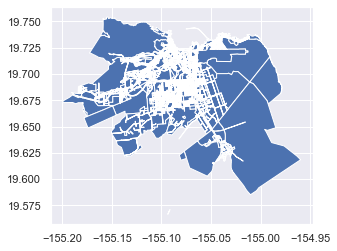

In [17]:
polygon = hilo_zones_relevant[["polygon","zone_type"]]
polygon = gpd.GeoDataFrame(polygon, geometry = polygon["polygon"])
polygon.plot()

<AxesSubplot:>

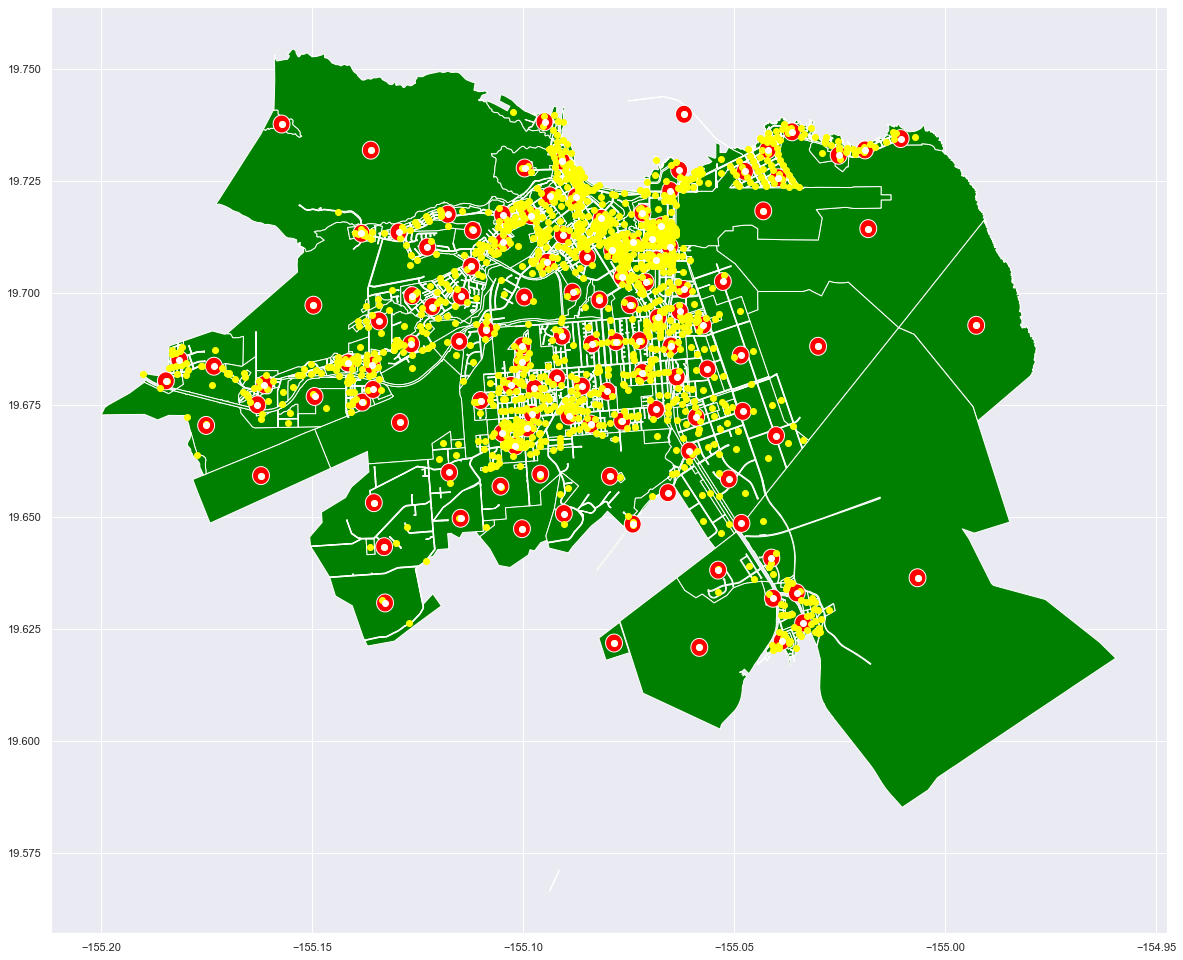

In [18]:
# Visualization
fig, ax = plt.subplots(figsize=(20, 20))
polygon.plot(ax=ax, color="green")
center_gdf_1.plot(ax=ax,color="red")
hilo_zones_relevant_gdf.plot(ax=ax, color="yellow")
center_gdf.plot(ax=ax, color="white")

In [23]:
# Create the parcel polygon geojson we use for our map
polygon.iloc[:,1:].to_file("Hilo_parcel_polygon.geojson", driver="GeoJSON")

In [19]:
# Create the geojson for cluster buffer zone (collection point's coverage area)
center_gdf_1.to_file("Hilo_parcel_cluster_buffer_125.geojson", driver="GeoJSON")

In [20]:
# Create the geojson for cluster center (collection point)
center_gdf.to_file("Hilo_parcel_cluster_center_125.geojson", driver="GeoJSON")

In [21]:
# Create the geojson for parcel centriod
hilo_zones_relevant_gdf[["objectid","geometry","zone"]].to_file("Hilo_centroid_125.geojson", driver="GeoJSON")

#### Please use Hilo_Collection_Sites for further operation
####  I use QGIS and ArcGIS to finish mapping, the links are in the README.md